# Exploring Cortical Acetylcholine Dynamics Dataset

**WARNING: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.**

This notebook demonstrates how to access and analyze data from DANDI:001176, which contains simultaneous recordings of acetylcholine sensor activity, cholinergic axon activity, and behavioral measurements in the cortex of awake mice.

## Dataset Overview

This dataset includes simultaneous in vivo imaging data of:
- Acetylcholine (ACh) sensors 
- GCaMP-expressing axons in the cortex
- Behavioral measurements (pupil size, locomotion)

The data was collected during spontaneous changes in behavioral states in awake animals, providing insights into the spatiotemporal properties of cortical ACh release and its correlation with axonal activity.

## Required Packages

To run this notebook, you'll need the following packages:
- pynwb
- lindi
- numpy
- matplotlib

These should be installed in your Python environment before proceeding.

## Loading the Dataset

First, let's use the DANDI API to list all assets in this dataset:

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001176")
assets = list(dandiset.get_assets())

print(f"Total number of assets: {len(assets)}")
print("\nSample of available recordings:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Total number of assets: 132

Sample of available recordings:
- sub-16/sub-16_ses-16-4-2-Ach-M1_behavior+ophys.nwb
- sub-18/sub-18_ses-18-1-2-Ach-M1_behavior+ophys.nwb
- sub-16/sub-16_ses-16-1-2-Ach-M1_behavior+ophys.nwb
- sub-16/sub-16_ses-16-4-1-Ach-M1_behavior+ophys.nwb
- sub-16/sub-16_ses-16-3-1-Ach-M1_behavior+ophys.nwb


## Analyzing an Example Recording

We'll analyze one recording session to demonstrate how to work with this data. We'll use a recording from subject 23892 that includes both behavioral and imaging data from V1.

Let's load the NWB file and examine its contents:

In [2]:
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt

# Load the NWB file
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001176/assets/b22180d0-41dc-4091-a334-2e5bd4b5c548/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print basic metadata
print(f"Session ID: {nwb.identifier}")
print(f"Experiment Description: {nwb.experiment_description}")
print(f"Subject: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")

Session ID: JR_BCM_23892_19_1_Ach_V1
Experiment Description: scans recording a green ACh sensor (GACh3.0) in Primary visual cortex
Subject: 23892
Age: P840D
Sex: F


## Exploring the Imaging Field

The dataset contains two-photon imaging data from visual cortex. Let's examine the imaging field structure:

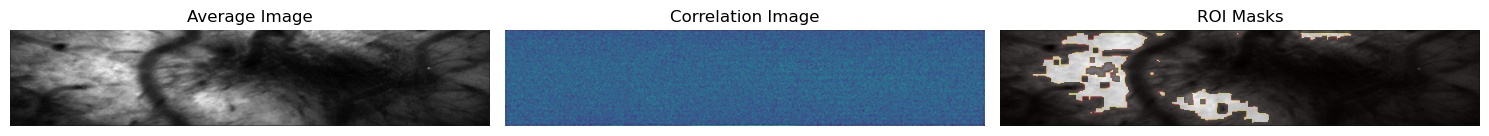

In [3]:
# Get the summary images and masks
avg_img = nwb.processing['ophys']['SummaryImages_chan1']['average'].data[:]
corr_img = nwb.processing['ophys']['SummaryImages_chan1']['correlation'].data[:]
masks = nwb.processing['ophys']['ImageSegmentation']['PlaneSegmentation1']['image_mask'].data[:]

# Create figure
plt.figure(figsize=(15, 5))

# Plot average image
plt.subplot(131)
plt.imshow(avg_img, cmap='gray')
plt.title('Average Image')
plt.axis('off')

# Plot correlation image
plt.subplot(132)
plt.imshow(corr_img, cmap='viridis')
plt.title('Correlation Image')
plt.axis('off')

# Plot masks overlaid on average image
plt.subplot(133)
plt.imshow(avg_img, cmap='gray')
mask_overlay = np.max(masks, axis=0)
plt.imshow(mask_overlay, cmap='hot', alpha=0.5)
plt.title('ROI Masks')
plt.axis('off')

plt.tight_layout()
plt.show()

The images above show:
- Average Image: The mean fluorescence across all frames
- Correlation Image: Local correlations in the fluorescence signal
- ROI Masks: The identified regions of interest overlaid on the average image

The ROIs appear to follow structural features visible in the average image, likely corresponding to cholinergic axons or processes containing ACh sensors.

## Analyzing Neural Activity and Behavior

Let's examine the temporal dynamics of neural activity and behavioral measurements:

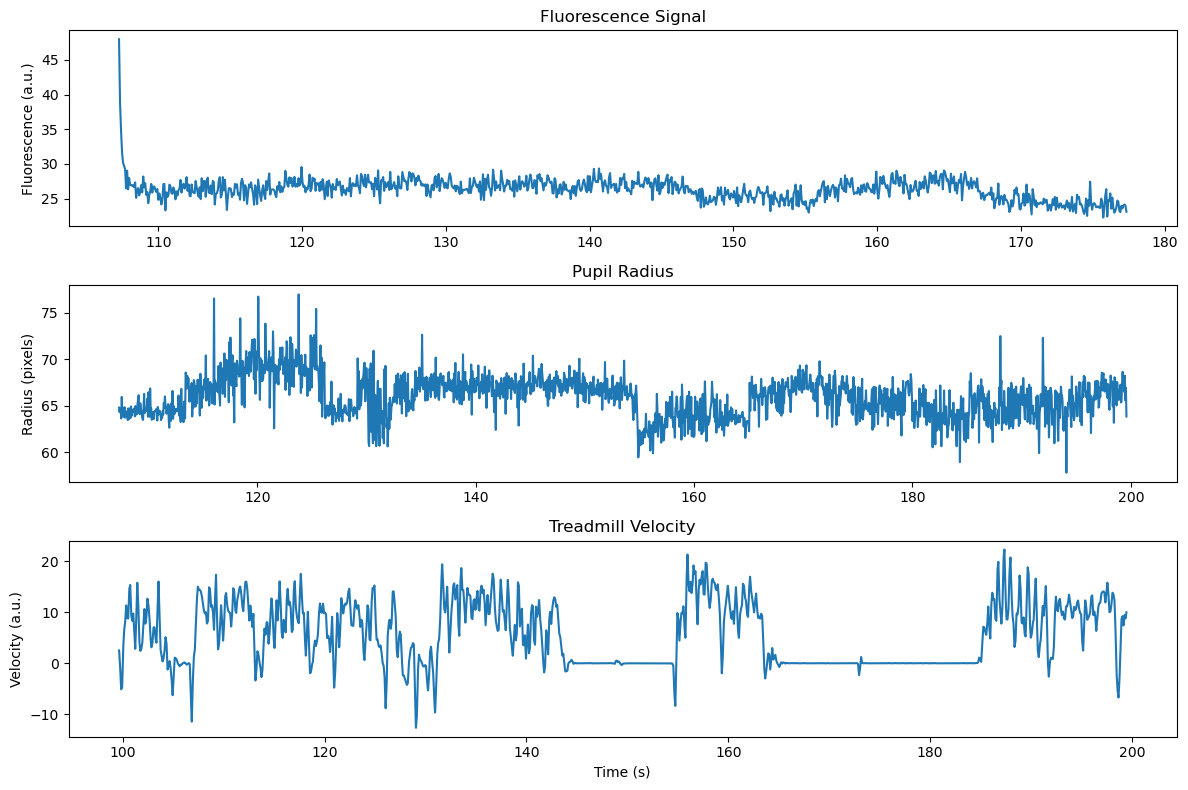

In [4]:
# Get fluorescence data (first 1000 timepoints)
fluorescence = nwb.processing['ophys']['Fluorescence']['RoiResponseSeries1']
fluor_data = fluorescence.data[:1000]
fluor_times = fluorescence.timestamps[:1000]

# Get pupil radius data
pupil = nwb.acquisition['PupilTracking']['pupil_raw_radius']
pupil_data = pupil.data[:2000]
pupil_times = pupil.timestamps[:2000]

# Get treadmill velocity
velocity = nwb.acquisition['treadmill_velocity']
vel_data = velocity.data[:10000]
vel_times = velocity.timestamps[:10000]

# Create figure
plt.figure(figsize=(12, 8))

# Plot fluorescence
plt.subplot(311)
plt.plot(fluor_times, fluor_data)
plt.title('Fluorescence Signal')
plt.ylabel('Fluorescence (a.u.)')

# Plot pupil radius
plt.subplot(312)
plt.plot(pupil_times, pupil_data)
plt.title('Pupil Radius')
plt.ylabel('Radius (pixels)')

# Plot velocity
plt.subplot(313)
plt.plot(vel_times, vel_data)
plt.title('Treadmill Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (a.u.)')

plt.tight_layout()
plt.show()

The plots above show:
- Fluorescence Signal: Activity from the ACh sensor, showing both baseline fluctuations and transient events
- Pupil Radius: Changes in pupil size, which can indicate arousal state
- Treadmill Velocity: Periods of movement (non-zero velocity) and rest (zero velocity)

## Next Steps for Analysis

Here are some potential analyses you might want to perform with this dataset:

1. Correlation analysis between:
   - ACh sensor activity and behavioral state (running vs. rest)
   - ACh sensor activity and pupil size
   - Different ROIs within the same field

2. Event detection:
   - Identify significant ACh transients
   - Characterize the temporal properties of ACh events
   - Analyze event timing relative to behavioral state changes

3. Population analysis:
   - Compare ACh dynamics across different recording sessions
   - Examine spatial patterns of ACh release
   - Study relationships between ACh activity and behavioral state transitions

4. Statistical analysis:
   - Quantify the reliability of ACh responses
   - Test for significant correlations between variables
   - Compare ACh dynamics across different behavioral conditions